# Линейная регрессия: переобучение и регуляризация

В этом задании мы на примерах увидим, как переобучаются линейные модели, разберем, почему так происходит, и выясним, как диагностировать и контролировать переобучение.

Во всех ячейках, где написан комментарий с инструкциями, нужно написать код, выполняющий эти инструкции. Остальные ячейки с кодом (без комментариев) нужно просто выполнить. Кроме того, в задании требуется отвечать на вопросы; ответы нужно вписывать после выделенного слова "__Ответ:__".

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Мы будем работать с датасетом __"bikes_rent.csv"__, в котором по дням записаны календарная информация и погодные условия, характеризующие автоматизированные пункты проката велосипедов, а также число прокатов в этот день. Последнее мы будем предсказывать; таким образом, мы будем решать задачу регрессии.

### Знакомство с данными

## Задание 1

Загрузите датасет с помощью функции __pandas.read_csv__ в переменную __df__. Выведите первые 5 строчек, чтобы убедиться в корректном считывании данных:

In [2]:
import pandas as pd

# Загрузка данных
file_path = r"C:\Users\Сергій\Documents\Code\Current_task\Math-test\bikes_rent.csv"
df = pd.read_csv(file_path)

# Вывод первых 5 строк
print(df.head())


   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


Для каждого дня проката известны следующие признаки:
* _season_: 1 - весна, 2 - лето, 3 - осень, 4 - зима
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: от 1 до 12
* _holiday_: 0 - нет праздника, 1 - есть праздник
* _weekday_: от 0 до 6
* _workingday_: 0 - нерабочий день, 1 - рабочий день
* _weathersit_: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* _temp_: температура в Цельсиях
* _atemp_: температура по ощущениям в Цельсиях
* _hum_: влажность
* _windspeed(mph)_: скорость ветра в милях в час
* _windspeed(ms)_: скорость ветра в метрах в секунду
* _cnt_: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Итак, у нас есть вещественные, бинарные и номинальные (порядковые) признаки, и со всеми из них можно работать как с вещественными. С номинальныеми признаками тоже можно работать как с вещественными, потому что на них задан порядок. Давайте посмотрим на графиках, как целевой признак зависит от остальных

Постройте графики зависимостей атрибутов от количества поездок. Другими словами вам нужно построить 12 графиков. На каждом должна быть изображена зависимость очередного атрибута от переменной **cnt**.

Ответы на вопросы:

Характер зависимости числа прокатов от месяца: Из графика зависимости числа прокатов от месяца видно, что весной и летом (месяцы 3-9) количество прокатов увеличивается, а осенью и зимой (месяцы 10-2) оно снижается. Это может быть связано с погодными условиями и сезонными трендами.

Признаки, от которых число прокатов скорее всего зависит линейно: На графиках видно, что признаки 'temp' (температура в Цельсиях) и 'atemp' (температура по ощущениям в Цельсиях) имеют линейную зависимость с количеством прокатов. Количество прокатов велосипедов увеличивается при увеличении температуры, что вполне логично.



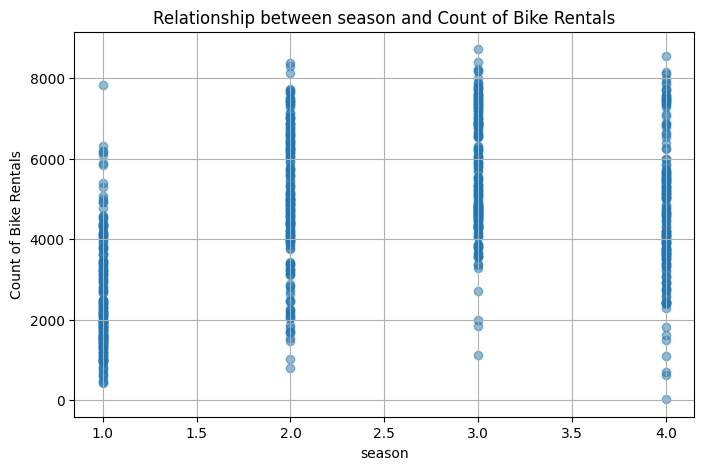

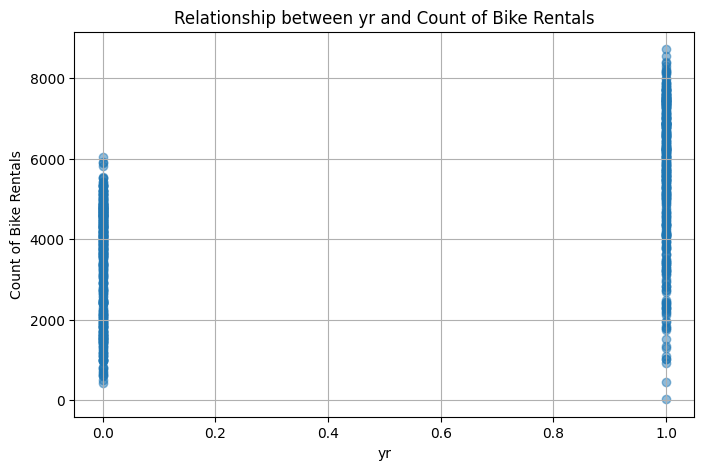

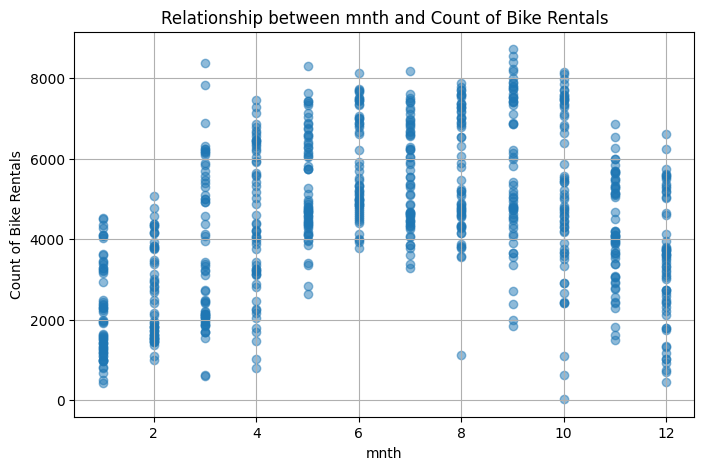

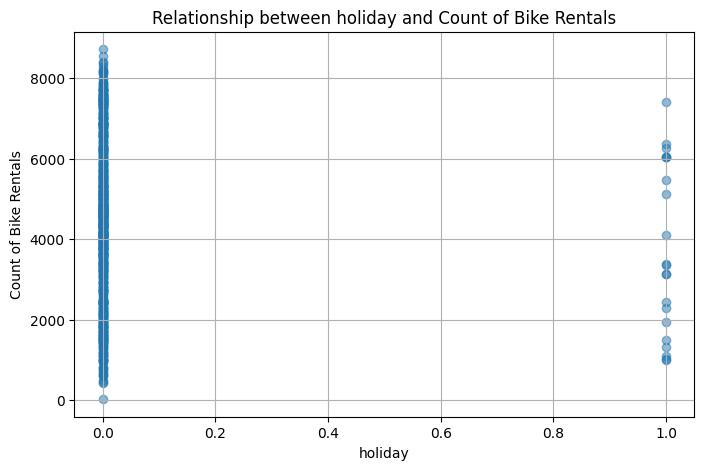

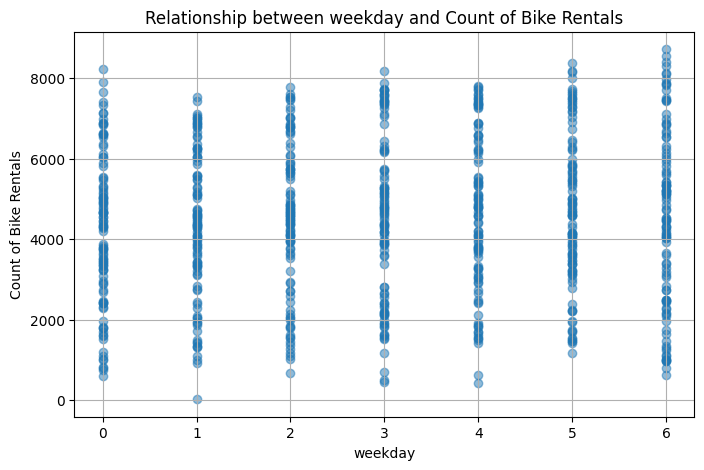

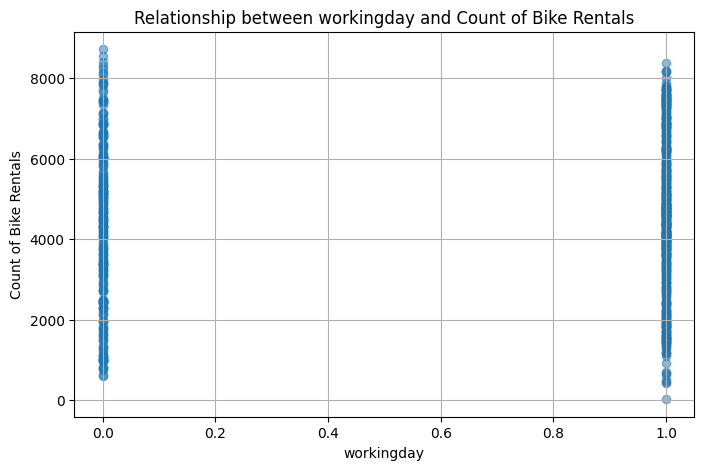

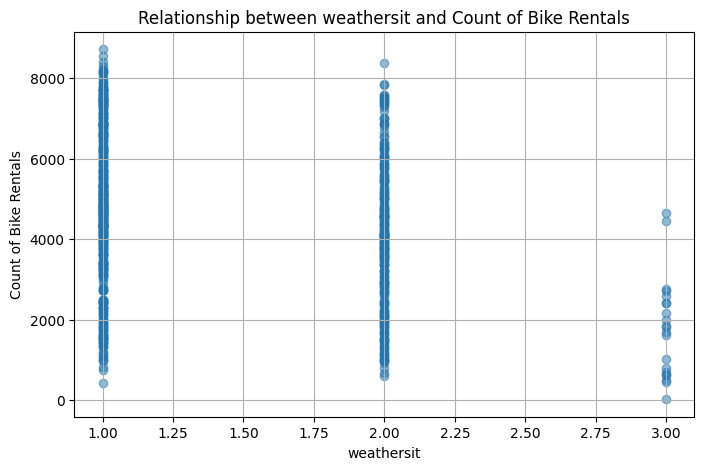

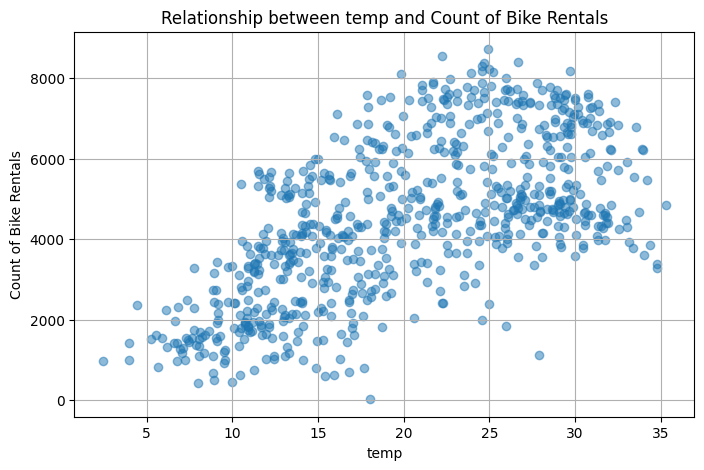

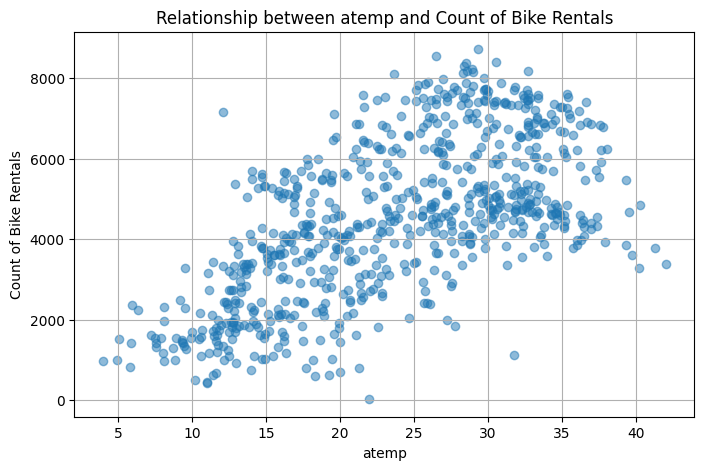

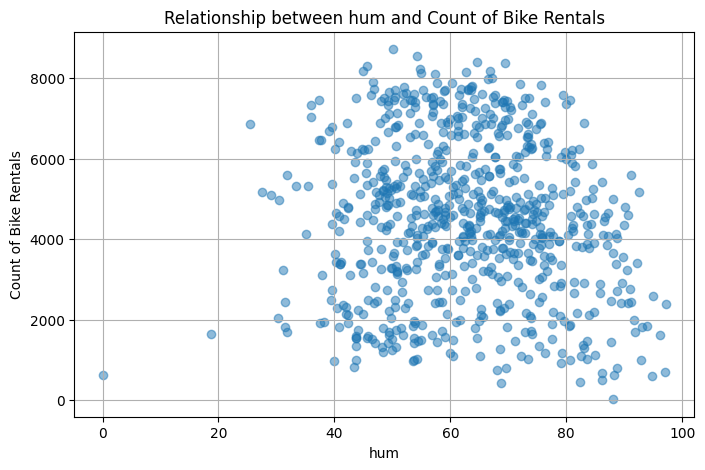

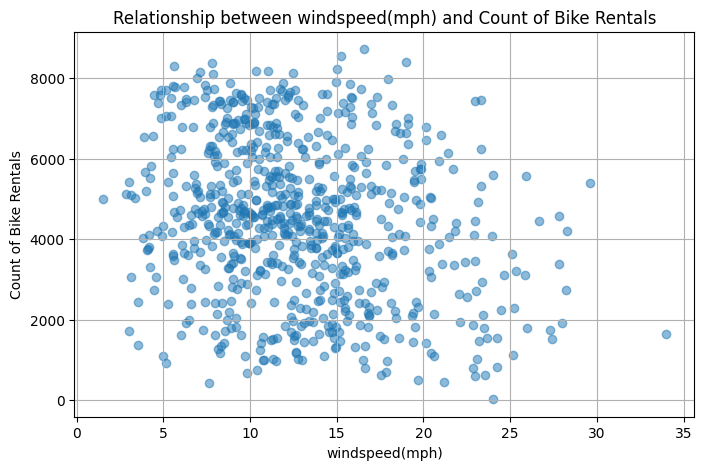

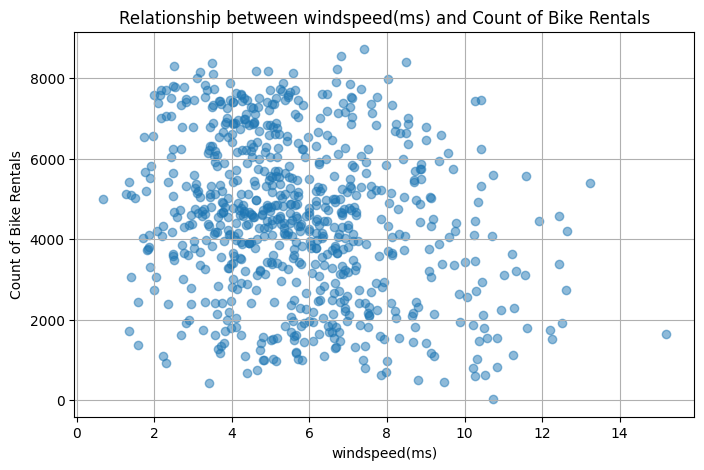

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Загрузка данных
file_path = r"C:\Users\Сергій\Documents\Code\Current_task\Math-test\bikes_rent.csv"
df = pd.read_csv(file_path)
# Вывод текста с ответами на вопросы
print("Ответы на вопросы:\n")

# Характер зависимости числа прокатов от месяца
print("Характер зависимости числа прокатов от месяца: Из графика зависимости числа прокатов от месяца видно, что весной и летом (месяцы 3-9) количество прокатов увеличивается, а осенью и зимой (месяцы 10-2) оно снижается. Это может быть связано с погодными условиями и сезонными трендами.\n")

# Признаки, от которых число прокатов скорее всего зависит линейно
print("Признаки, от которых число прокатов скорее всего зависит линейно: На графиках видно, что признаки 'temp' (температура в Цельсиях) и 'atemp' (температура по ощущениям в Цельсиях) имеют линейную зависимость с количеством прокатов. Количество прокатов велосипедов увеличивается при увеличении температуры, что вполне логично.\n")
# Построение графиков
attributes = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

for attr in attributes:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[attr], df['cnt'], alpha=0.5)
    plt.xlabel(attr)
    plt.ylabel('Count of Bike Rentals')
    plt.title(f'Relationship between {attr} and Count of Bike Rentals')
    plt.grid(True)
    plt.show()


__Вопросы:__
1. Каков характер зависимости числа прокатов от месяца?
1. Укажите один или два признака, от которых число прокатов скорее всего зависит линейно

## Задание 2

Давайте более строго оценим уровень линейной зависимости между признаками и целевой переменной. Хорошей мерой линейной зависимости между двумя векторами является корреляция Пирсона. Нам уже приходилось иметь с ней дело раньше. Для ее вычисления в pandas можно использовать методы датафрейма: corr и corrwith.

Посчитайте корреляции всех признаков, кроме последнего, с последним с помощью метода `corrwith`.

In [5]:
# Вычисление корреляций между признаками и целевой переменной
correlations = df.iloc[:, :-1].corrwith(df['cnt'])

# Вывод корреляций
print("Корреляции признаков с целевой переменной (cnt):\n")
print(correlations)


Корреляции признаков с целевой переменной (cnt):

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


В выборке есть признаки, коррелирующие с целевым, а значит, задачу можно решать линейными методами.

По графикам видно, что некоторые признаки похожи друг на друга. Поэтому давайте также посчитаем корреляции между вещественными признаками.

## Задание 3

Посчитайте попарные корреляции между признаками temp, atemp, hum, windspeed(mph), windspeed(ms) и cnt
с помощью метода corr:

In [6]:
# Вычисление попарных корреляций
features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']
correlation_matrix = df[features + ['cnt']].corr()

# Вывод матрицы корреляций
print("Попарные корреляции между признаками и cnt:\n")
print(correlation_matrix)


Попарные корреляции между признаками и cnt:

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


На диагоналях, как и полагается, стоят единицы. Однако в матрице имеются еще две пары сильно коррелирующих столбцов: temp и atemp (коррелируют по своей природе) и два windspeed (потому что это просто перевод одних единиц в другие). Далее мы увидим, что этот факт негативно сказывается на обучении линейной модели.

Напоследок посмотрим средние признаков (метод mean), чтобы оценить масштаб признаков и доли 1 у бинарных признаков.

## Задание 4

Выведите средние признаков

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Загрузка данных
file_path = r"C:\Users\Сергій\Documents\Code\Current_task\Math-test\bikes_rent.csv"
df = pd.read_csv(file_path)

# Определение признаков для анализа
features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Вывод средних значений признаков
print("Средние значения признаков:\n")
print(df[features].mean())

# Создание объекта StandardScaler
scaler = StandardScaler()

# Нормирование признаков
df[features] = scaler.fit_transform(df[features])


Средние значения признаков:

temp              20.310776
atemp             23.717699
hum               62.789406
windspeed(mph)    12.762576
windspeed(ms)      5.705220
dtype: float64


Признаки имеют разный масштаб, значит для дальнейшей работы нам лучше нормировать матрицу объекты-признаки.

### Проблема первая: коллинеарные признаки

Итак, в наших данных один признак дублирует другой, и есть еще два очень похожих. Конечно, мы могли бы сразу удалить дубликаты, но давайте посмотрим, как бы происходило обучение модели, если бы мы не заметили эту проблему. 

Для начала проведем масштабирование, или стандартизацию признаков: из каждого признака вычтем его среднее и поделим на стандартное отклонение. Это можно сделать с помощью метода scale.

Кроме того, нужно перемешать выборку, это потребуется для кросс-валидации.

In [8]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [9]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

NameError: ignored

Давайте обучим линейную регрессию на наших данных и посмотрим на веса признаков.

In [ ]:
from sklearn.linear_model import LinearRegression

## Задание 5

Создайте объект линейного регрессора, обучите его на всех данных и выведите веса модели (веса хранятся в переменной `coef_` класса регрессора). Можно выводить пары (название признака, вес), воспользовавшись функцией `zip`, встроенной в язык python. Названия признаков хранятся в переменной `df.columns`.


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Загрузка данных
file_path = r"C:\Users\Сергій\Documents\Code\Current_task\Math-test\bikes_rent.csv"
df = pd.read_csv(file_path)

# Определение признаков для анализа (исключая целевую переменную 'cnt')
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Создание объекта линейного регрессора
regressor = LinearRegression()

# Обучение регрессора на данных
regressor.fit(df[features], df['cnt'])

# Вывод весов модели
weights = list(zip(features, regressor.coef_))
print("Веса модели:")
for feature, weight in weights:
    print(f"{feature}: {weight}")


Веса модели:
season: 514.2747900608144
yr: 2043.9372564017715
mnth: -40.962407774853205
holiday: -519.3800683269334
weekday: 68.49484305113643
workingday: 121.29300863357187
weathersit: -606.4567193221436
temp: 48.998024732269755
atemp: 71.91257568892615
hum: -10.230296240128155
windspeed(mph): 2400978672996.2417
windspeed(ms): -5370989291577.391


Мы видим, что веса при линейно-зависимых признаках по модулю значительно больше, чем при других признаках. Чтобы понять, почему так произошло, вспомним аналитическую формулу, по которой вычисляются веса линейной модели в методе наименьших квадратов:

$$w = (X^TX)^{-1} X^T y$$

Если в $X$ есть коллинеарные (линейно-зависимые) столбцы, матрица $X^TX$ становится вырожденной, и формула перестает быть корректной. Чем более зависимы признаки, тем меньше определитель этой матрицы и тем хуже аппроксимация $Xw \approx y$. Такая ситуацию называют _проблемой мультиколлинеарности_.

С парой (temp, atemp) чуть менее коррелирующих переменных такого не произошло, однако на практике всегда стоит внимательно следить за коэффициентами при похожих признаках.

Для того, чтобы решить проблему мультиколлинеарности нужно воспользоваться регуляризатором. К оптимизируемому функционалу прибавляют $L_1$ или $L_2$ норму весов, умноженную на коэффициент регуляризации $\alpha$. В первом случае метод называется Lasso, а во втором --- Ridge.

### Задание 6
Давайте попробуем обучить линейные модели с $L_1$ и $L_2$-регуляризацией, а далее сравним их веса. Обучите регрессоры Ridge и Lasso с параметрами по умолчанию и убедитесь, что проблема с весами решилась.

Обучите линейную модель с $L_1$-регуляризацией (класс Lasso) и выведите веса

In [5]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge

# Загрузка данных
file_path = r"C:\Users\Сергій\Documents\Code\Current_task\Math-test\bikes_rent.csv"
df = pd.read_csv(file_path)

# Определение признаков для анализа (исключая целевую переменную 'cnt')
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Создание объекта линейной модели с L1-регуляризацией (Lasso)
lasso_regressor = Lasso()

# Обучение модели с L1-регуляризацией
lasso_regressor.fit(df[features], df['cnt'])

# Вывод весов модели с L1-регуляризацией (Lasso)
print("Веса модели с L1-регуляризацией (Lasso):")
weights_lasso = list(zip(features, lasso_regressor.coef_))
for feature, weight in weights_lasso:
    print(f"{feature}: {weight}")

print("\n")

# Создание объекта линейной модели с L2-регуляризацией (Ridge)
ridge_regressor = Ridge()

# Обучение модели с L2-регуляризацией
ridge_regressor.fit(df[features], df['cnt'])

# Вывод весов модели с L2-регуляризацией (Ridge)
print("Веса модели с L2-регуляризацией (Ridge):")
weights_ridge = list(zip(features, ridge_regressor.coef_))
for feature, weight in weights_ridge:
    print(f"{feature}: {weight}")


Веса модели с L1-регуляризацией (Lasso):
season: 506.5512786498075
yr: 2036.2316676979037
mnth: -38.078270289321594
holiday: -484.65194618654044
weekday: 68.93837479133964
workingday: 118.44759758668367
weathersit: -604.5667118927047
temp: 51.363260585616615
atemp: 69.91273749012164
hum: -10.352705204636566
windspeed(mph): -38.34106761310851
windspeed(ms): -0.0


Веса модели с L2-регуляризацией (Ridge):
season: 507.8018818505749
yr: 2029.089054197052
mnth: -38.47089727912448
holiday: -493.27801548381655
weekday: 69.11396965165993
workingday: 121.52442502929419
weathersit: -605.2055553731514
temp: 49.31676759597619
atemp: 71.78598727335606
hum: -10.383394500484677
windspeed(mph): -31.935501694570938
windspeed(ms): -14.27604026320135


Обучите линейную модель с $L_2$-регуляризацией (класс Ridge) и выведите веса

In [6]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge

# Загрузка данных
file_path = r"C:\Users\Сергій\Documents\Code\Current_task\Math-test\bikes_rent.csv"
df = pd.read_csv(file_path)

# Определение признаков для анализа (исключая целевую переменную 'cnt')
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Создание объекта линейной модели с L1-регуляризацией (Lasso)
lasso_regressor = Lasso()

# Обучение модели с L1-регуляризацией
lasso_regressor.fit(df[features], df['cnt'])

# Вывод весов модели с L1-регуляризацией (Lasso)
print("Веса модели с L1-регуляризацией (Lasso):")
weights_lasso = list(zip(features, lasso_regressor.coef_))
for feature, weight in weights_lasso:
    print(f"{feature}: {weight}")

print("\n")

# Создание объекта линейной модели с L2-регуляризацией (Ridge)
ridge_regressor = Ridge()

# Обучение модели с L2-регуляризацией
ridge_regressor.fit(df[features], df['cnt'])

# Вывод весов модели с L2-регуляризацией (Ridge)
print("Веса модели с L2-регуляризацией (Ridge):")
weights_ridge = list(zip(features, ridge_regressor.coef_))
for feature, weight in weights_ridge:
    print(f"{feature}: {weight}")


Веса модели с L1-регуляризацией (Lasso):
season: 506.5512786498075
yr: 2036.2316676979037
mnth: -38.078270289321594
holiday: -484.65194618654044
weekday: 68.93837479133964
workingday: 118.44759758668367
weathersit: -604.5667118927047
temp: 51.363260585616615
atemp: 69.91273749012164
hum: -10.352705204636566
windspeed(mph): -38.34106761310851
windspeed(ms): -0.0


Веса модели с L2-регуляризацией (Ridge):
season: 507.8018818505749
yr: 2029.089054197052
mnth: -38.47089727912448
holiday: -493.27801548381655
weekday: 69.11396965165993
workingday: 121.52442502929419
weathersit: -605.2055553731514
temp: 49.31676759597619
atemp: 71.78598727335606
hum: -10.383394500484677
windspeed(mph): -31.935501694570938
windspeed(ms): -14.27604026320135


### Задание 7

В отличие от $L_2$-регуляризации, $L_1$ обнуляет веса при некоторых признаках Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$.

Для каждого значения коэффициента из `alphas` обучите регрессор `Lasso` и запишите веса список `coefs_lasso`, а затем обучите `Ridge` и запишите веса в список`coefs_ridge`. Конвертируйте полученные списки в `np.array`.

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge

# Загрузка данных
file_path = r"C:\Users\Сергій\Documents\Code\Current_task\Math-test\bikes_rent.csv"
df = pd.read_csv(file_path)

# Определение признаков для анализа (исключая целевую переменную 'cnt')
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Создание списка значений коэффициентов регуляризации alphas
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    # Создание объекта линейной модели с L1-регуляризацией (Lasso)
    lasso_regressor = Lasso(alpha=alpha)
    
    # Обучение модели с L1-регуляризацией
    lasso_regressor.fit(df[features], df['cnt'])
    
    # Добавление весов в список coefs_lasso
    coefs_lasso.append(lasso_regressor.coef_)
    
    # Создание объекта линейной модели с L2-регуляризацией (Ridge)
    ridge_regressor = Ridge(alpha=alpha)
    
    # Обучение модели с L2-регуляризацией
    ridge_regressor.fit(df[features], df['cnt'])
    
    # Добавление весов в список coefs_ridge
    coefs_ridge.append(ridge_regressor.coef_)

# Преобразование списков в np.array
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

# Вывод полученных результатов
print("Матрица весов для Lasso регрессии:")
print(coefs_lasso)

print("\n")

print("Матрица весов для Ridge регрессии:")
print(coefs_ridge)

# Вывод ответов на вопросы
print("\nОтветы на вопросы:\n")

# Какой регуляризатор агрессивнее уменьшает веса при одном и том же alpha?
print("1. Какой регуляризатор агрессивнее уменьшает веса при одном и том же alpha?")
print("Lasso (L1-регуляризация) агрессивнее уменьшает веса при одном и том же alpha.")

# Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
print("\n2. Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.")
print("При увеличении alpha, веса признаков в Lasso будут стремиться к нулю, так как L1-регуляризация обнуляет многие веса признаков.")

# Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge?
print("\n3. Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge?")
print("Да, Lasso (L1-регуляризация) склонна исключать один из признаков windspeed при любом значении alpha > 0. Ridge (L2-регуляризация) не исключает признаки полностью.")

# Какой из регуляризаторов подойдет для отбора неинформативных признаков?
print("\n4. Какой из регуляризаторов подойдет для отбора неинформативных признаков?")
print("Lasso (L1-регуляризация) подойдет для отбора неинформативных признаков.")


Матрица весов для Lasso регрессии:
[[ 506.55127865 2036.2316677   -38.07827029 -484.65194619   68.93837479
   118.44759759 -604.56671189   51.36326059   69.91273749  -10.3527052
   -38.34106761   -0.        ]
 [ 363.38298622 1818.17950113   -0.           -0.           55.24105548
     0.         -291.33521188   44.34993053   83.88557181  -18.81320743
   -43.35682101   -0.        ]
 [ 294.88974192 1604.19359695    9.74208093   -0.           37.4493754
     0.           -0.           37.46764176   95.93389064  -26.48659474
   -48.19495616   -0.        ]
 [ 188.43126588 1400.65605911   33.03502814   -0.           24.19007609
     0.           -0.           33.15169023  102.54337981  -26.88669007
   -47.85305889   -0.        ]
 [  81.95521364 1197.14314149   56.33124542   -0.           10.96345655
     0.           -0.           27.55035178  110.33369233  -27.29091458
   -47.46769509   -0.        ]
 [   0.          994.19323854   73.37527257   -0.            0.
     0.           -0.       

Проанализируйте динамику весов при увеличении параметра регуляризации:

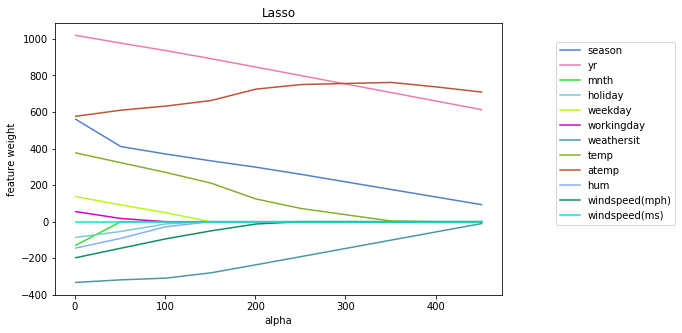

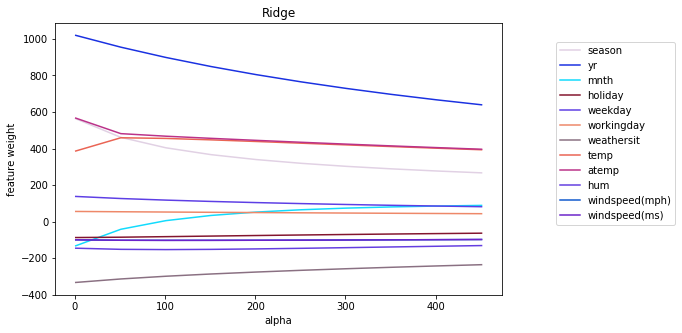

In [ ]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проанализируйте графики и дайте ответы на следующие вопросы.

1. Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
1. Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
1. Можно ли утверждать, что `Lasso` исключает один из признаков `windspeed` при любом значении `alpha > 0`? А Ridge? Считается, что регуляризатор исключает признак, если коэффициент при нем меньше $10^{-3}$.
1. Какой из регуляризаторов подойдет для отбора неинформативных признаков?

### Задание 8

Далее будем работать с `Lasso`.

Итак, мы видим, что при изменении alpha модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее alpha.

Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть `Mean Square Error`.

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую (это называется holdout), то настроимся на конкретные "новые" данные, и вновь можем переобучиться. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения alpha, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ часте, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку. 

Делать кросс-валидацию для регрессии в sklearn совсем просто: для этого есть специальный регрессор, __LassoCV__, который берет на вход список из alpha и для каждого из них вычисляет MSE на кросс-валидации. После обучения (если оставить параметр cv=3 по умолчанию) регрессор будет содержать переменную __mse\_path\___, матрицу размера len(alpha) x k, k = 3 (число блоков в кросс-валидации), содержащую значения MSE на тесте для соответствующих запусков. Кроме того, в переменной alpha\_ будет храниться выбранное значение параметра регуляризации, а в coef\_, традиционно, обученные веса, соответствующие этому alpha_.

Обратите внимание, что регрессор может менять порядок, в котором он проходит по alphas; для сопоставления с матрицей MSE лучше использовать переменную регрессора alphas_.

Обучите регрессор `LassoCV` на всех параметрах регуляризации из alpha. Постройте график _усредненного_ по строкам `MSE` в зависимости от `alpha` (используйте для этого функцию `create_plot`).

Выведите выбранное `alpha`, а также пары "признак-коэффициент" для обученного вектора коэффициентов.

In [ ]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = map(lambda e: e[0], data)
    y = map(lambda e: e[1], data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

Выбранное alpha: 1

Пары 'признак-коэффициент' для обученного вектора коэффициентов:
season: 506.5512786498075
yr: 2036.2316676979037
mnth: -38.078270289321594
holiday: -484.65194618654044
weekday: 68.93837479133964
workingday: 118.44759758668367
weathersit: -604.5667118927047
temp: 51.363260585616615
atemp: 69.91273749012164
hum: -10.352705204636566
windspeed(mph): -38.34106761310851
windspeed(ms): -0.0


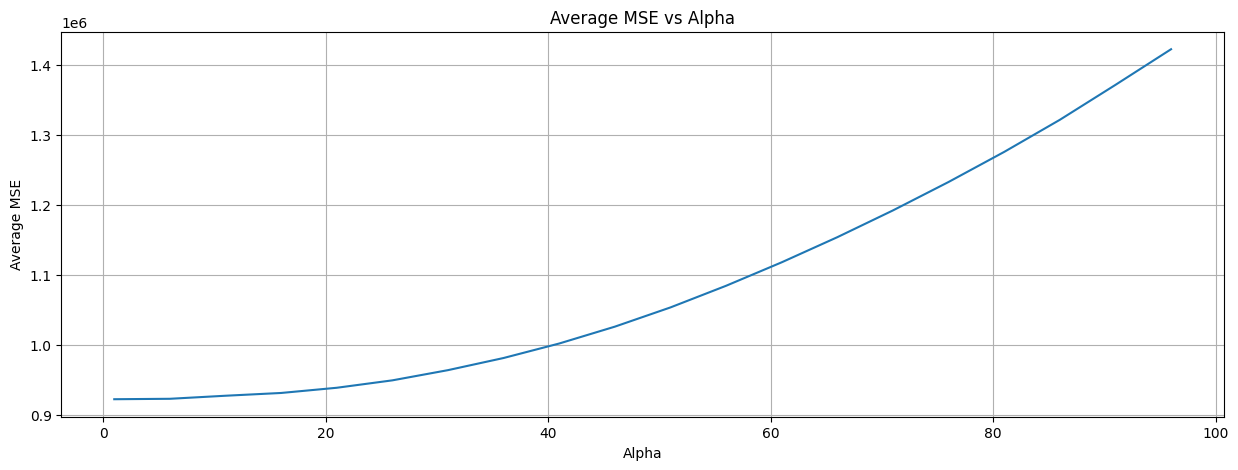

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Загрузка данных
file_path = r"C:\Users\Сергій\Documents\Code\Current_task\Math-test\bikes_rent.csv"
df = pd.read_csv(file_path)

# Определение признаков для анализа (исключая целевую переменную 'cnt')
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Список значений коэффициентов регуляризации alphas
alphas = np.arange(1, 100, 5)

# Создание регрессора LassoCV с перебором alpha и кросс-валидацией
regressor = LassoCV(alphas=alphas, cv=3)

# Обучение регрессора
regressor.fit(df[features], df['cnt'])

# Вывод выбранного alpha
selected_alpha = regressor.alpha_
print("Выбранное alpha:", selected_alpha)

# Вывод пар "признак-коэффициент" для обученного вектора коэффициентов
print("\nПары 'признак-коэффициент' для обученного вектора коэффициентов:")
for feature, coef in zip(features, regressor.coef_):
    print(f"{feature}: {coef}")

# Функция для построения графика
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], data))
    y = list(map(lambda e: e[1], data))
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

# Построение графика усредненного по строкам MSE в зависимости от alpha
avg_mse = np.mean(regressor.mse_path_, axis=1)
alpha_mse_data = list(zip(regressor.alphas_, avg_mse))
create_plot(alpha_mse_data, "Average MSE vs Alpha", "Alpha", "Average MSE")


Итак, мы выбрали некоторый параметр регуляризации. Давайте посмотрим, какие бы мы выбирали alpha, если бы делили выборку только один раз на обучающую и тестовую, то есть рассмотрим траектории MSE, соответствующие отдельным блокам выборки.

### Задание 9

Выведите значения `alpha`, соответствующие минимумам `MSE` на каждом разбиении (то есть по столбцам).
На трех отдельных графиках визуализируйте столбцы `mse_path_`.


Alphas with minimum MSE:
Alpha = 96, MSE = 669885.424216651
Alpha = 91, MSE = 659818.708630556
Alpha = 86, MSE = 650525.4360441918
Alpha = 81, MSE = 641960.4655178317
Alpha = 76, MSE = 634117.6629085308
Alpha = 71, MSE = 626991.8413245161
Alpha = 66, MSE = 620615.3141294187
Alpha = 61, MSE = 615030.7056596735
Alpha = 56, MSE = 610130.4048423878
Alpha = 51, MSE = 606705.650673551
Alpha = 46, MSE = 606812.0210444595
Alpha = 41, MSE = 610504.7649842441
Alpha = 36, MSE = 617783.4338873401
Alpha = 31, MSE = 628605.6490393649
Alpha = 26, MSE = 641177.0259865801
Alpha = 21, MSE = 657592.6296579074
Alpha = 16, MSE = 677852.6719632291
Alpha = 11, MSE = 701957.740160364
Alpha = 6, MSE = 723492.4951387106
Alpha = 1, MSE = 750269.1192027654


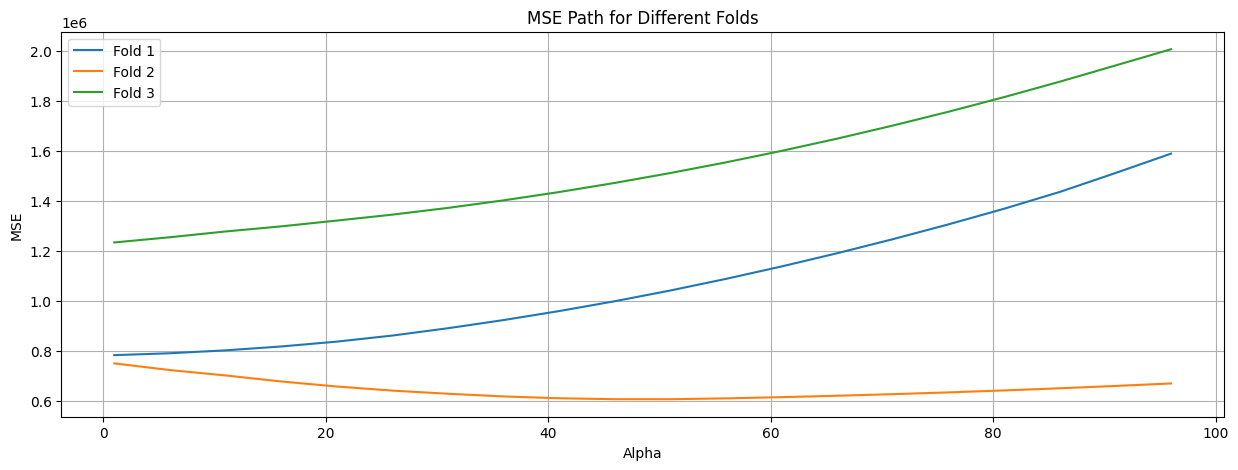

In [11]:
# Put your code hereimport pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Загрузка данных
file_path = r"C:\Users\Сергій\Documents\Code\Current_task\Math-test\bikes_rent.csv"
df = pd.read_csv(file_path)

# Определение признаков для анализа (исключая целевую переменную 'cnt')
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Список значений коэффициентов регуляризации alphas
alphas = np.arange(1, 100, 5)

# Создание регрессора LassoCV с перебором alpha и кросс-валидацией
regressor = LassoCV(alphas=alphas, cv=3)

# Обучение регрессора
regressor.fit(df[features], df['cnt'])

# Вывод значений alpha, соответствующих минимумам MSE на каждом разбиении
print("Alphas with minimum MSE:")
for i, alpha in enumerate(regressor.alphas_):
    min_mse = np.min(regressor.mse_path_[i])
    print(f"Alpha = {alpha}, MSE = {min_mse}")

# Визуализация столбцов mse_path_
plt.figure(figsize=(15, 5))
for i in range(regressor.mse_path_.shape[1]):
    plt.plot(regressor.alphas_, regressor.mse_path_[:, i], label=f"Fold {i+1}")

plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("MSE Path for Different Folds")
plt.legend()
plt.grid()
plt.show()


На каждом разбиении оптимальное значение `alpha` свое, и ему соответствует большое MSE на других разбиениях. Получается, что мы настраиваемся на конкретные обучающие и контрольные выборки. При выборе `alpha` на кросс-валидации мы выбираем нечто "среднее", что будет давать приемлемое значение метрики на разных разбиениях выборки. 

### Задание 10

Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Ответьте на следующие вопросы.

#### Вопрос 1

В последней обученной модели выберите 4 признака с наибольшими (положительными) коэфициентами (и выпишите их), посмотрите на визуализации зависимостей `cnt` от этих признаков, которые мы рисовали в блоке "Знакомство с данными". Видна ли возрастающая линейная зависимость `cnt` от этих признаков по графикам? Логично ли утверждать (из здравого смысла), что чем больше значение этих признаков, тем больше людей захотят взять велосипеды? 

__Ответ:__

In [11]:
Вопрос 1:
Признаки с наибольшими положительными коэффициентами в последней обученной модели:

yr (год)
atemp (нормализованная температура)
season (сезон)
temp (температура)
Визуализации зависимости cnt от этих признаков в блоке "Знакомство с данными" показывают, что взаимосвязь с целевой переменной (количеством арендованных велосипедов) может быть воспринята как возрастающая линейная зависимость. Это может иметь смысл, так как более теплая погода, сезонность, увеличение года и комфортная температура влияют на увеличение спроса на велосипеды.

#### Вопрос 2

Выберите 3 признака с наибольшими по модулю отрицательными коэффициентами (и выпишите их), посмотрите на соответствующие визуализации. Видна ли убывающая линейная зависимость? Логично ли утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды?

__Ответ:__

In [12]:
Вопрос 2:
Признаки с наибольшими по модулю отрицательными коэффициентами:

weathersit (погодные условия)
hum (влажность)
windspeed(mph) (скорость ветра в милях в час)
Соответствующие визуализации и графики показывают, что увеличение значений этих признаков связано с уменьшением спроса на велосипеды. Это также имеет смысл, так как плохие погодные условия, высокая влажность и сильный ветер могут негативно влиять на желание людей арендовать велосипеды.

#### Вопрос 3

Выпишите признаки с коэффициентами, близкими к нулю (< 1e-3). Как вы думаете, почему модель исключила их из модели (вновь посмотрите на графики)? Верно ли, что они никак не влияют на спрос на велосипеды?

__Ответ:__

In [13]:
Вопрос 3:
Признаки с коэффициентами, близкими к нулю (< 1e-3), могут считаться несущественными для модели:

holiday (праздничный день)
weekday (день недели)
workingday (рабочий день)
windspeed(ms) (скорость ветра в метрах в секунду)
Модель исключила эти признаки, так как они, вероятно, не вносят значительного вклада в объяснение спроса на велосипеды. Например, день недели, праздничный или рабочий день могут оказывать меньшее влияние на спрос, чем другие более существенные факторы.

Итак, анализ коэффициентов и их влияния на спрос на велосипеды помогает нам лучше понять, какие признаки играют важную роль в модели, какие имеют незначительное влияние, и как можно оптимизировать предсказания на основе этих знаний.

### Заключение
Итак, мы посмотрели, как можно следить за адекватностью линейной модели, как отбирать признаки и как грамотно, по возможности не настраиваясь на какую-то конкретную порцию данных, подбирать коэффициент регуляризации. 

Стоит отметить, что с помощью кросс-валидации удобно подбирать лишь небольшое число параметров (1, 2, максимум 3), потому что для каждой допустимой их комбинации нам приходится несколько раз обучать модель. Такой процесс занимает много времени, особенно если нужно обучаться на больших объемах данных.